<span style="color:blue; font-size:24px;"><b>LDA analysis of university complaints</b></span>

<span style="color:orange; font-size:18px;"><b>0. Loading the data</b></span>

In [1]:
import os
import sys
import pandas as pd

# Project root path
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(BASE_DIR)

DATA_PATH = os.path.join(BASE_DIR, "data", "raw", "Datasetprojpowerbi.csv")
df = pd.read_csv(DATA_PATH)

texts = df["Reports"].tolist()
print(f"Loaded {len(texts)} docs.")

Loaded 1005 docs.


<span style="color:orange; font-size:18px;"><b>1. Cleaning and tokenizing</b></span>

In [2]:
from src.preprocessing.clean_for_lsa_lda import normalize_texts, lemmatize_and_tokenize, apply_ngrams

# 1. Normalization
cleaned_texts = normalize_texts(texts)

# 2. Lemmatization and tokenization
tokenized_texts = lemmatize_and_tokenize(cleaned_texts)

# 3. N-gramms
corpus_tokens = apply_ngrams(tokenized_texts)

print(f"Cleaned and tokenized {len(corpus_tokens)} docs.")

Cleaned and tokenized 1005 docs.


In [3]:
# Checking most common words to include not relevant into domain stopwords and repeat tokenization
from collections import Counter

counts = Counter(token for doc in corpus_tokens for token in doc)
top_100 = counts.most_common(100)
for word, freq in top_100:
    print(word, freq)

student 295
university 170
make 164
find 124
need 123
campus 122
hard 116
option 114
time 108
difficult 107
wish 92
available 87
resource 80
struggle 79
frustrating 77
really 74
get 74
opportunity 69
feel_like 67
class 64
support 63
lack 59
food 55
often 53
offer 53
help 50
provide 49
academic 48
online 48
international 48
course_material 46
take 46
study 46
feel 46
experience 46
course 43
access 41
work 41
pay 37
language 37
enough 36
coursework 36
cause 36
online_class 36
professor 34
challenge 34
job 34
job_opportunity 33
limited 32
important 32
process 32
cultural 32
try 31
learn 31
keep 31
well 30
cost 29
high 28
way 27
field 27
career 27
academic_workload 27
manage 27
always 26
program 26
due 26
mental_health 26
athlete 26
would 25
afford 25
stress 25
would_great 25
certificate 25
material 24
like 24
receive 24
money 24
limited_access 24
skill 24
focus 24
able 23
area 23
balance 23
affordable 23
difficulty 22
overwhelming 21
different 21
new 21
lot 21
connect 21
event 21
financia

In [6]:
# High frequency words but too adstact - not adding important information about the object of a claim. 

domain_stopwords = [    
    "make", "need", "hard", "difficult", "wish", "really", "feel", "experience",
    "get", "feel_like", "often", "student", "university", "lack", "take", "enough",
    "challenge", "limited", "important", "try", "keep", "high", "way", "always", "due", 
    "would", "afford", "would_great", "like", "able", "affordable", "different", "seem",
    "especially", "could", "frustrating"
]

# 2. Lemmatization and tokenization
tokenized_texts = lemmatize_and_tokenize(cleaned_texts, domain_stopwords)

# 3. N-gramms
corpus_tokens = apply_ngrams(tokenized_texts)

print(f"Cleaned and tokenized {len(corpus_tokens)} docs.")

Cleaned and tokenized 1005 docs.


In [7]:
counts = Counter(token for doc in corpus_tokens for token in doc)
top_100 = counts.most_common(100)
for word, freq in top_100:
    print(word, freq)

find 124
campus 122
time 118
option 114
available 87
resource 80
struggle 79
opportunity 69
access 65
class 64
support 63
offer 62
food 55
help 50
provide 49
academic 48
online 48
international 48
study 46
pay 44
course 43
work 41
great 37
language 37
cafeteria 37
coursework 36
cause 36
online_class 36
professor 34
job 34
job_opportunity 33
process 32
cultural 32
learn 31
well 30
course_material 30
cost 29
field 27
career 27
academic_workload 27
manage 27
program 26
athlete 26
stress 25
mental_health 25
sometimes 25
certificate 25
receive 24
money 24
focus 24
area 23
balance 23
access_research_database_material 21
overwhelming 21
new 21
sleep 21
lot 21
connect 21
event 21
financial_aid 21
affair_office 21
quality 20
access_technology_software 20
start 20
college 20
culture 20
see 20
housing 20
worried 19
miss 19
succeed 19
prioritize 19
balance_work_academic_responsibility 19
sport 19
live 19
mental_health_care 19
cause_lot 18
know 18
think 18
much 18
medical 18
near 18
understand 17
a

<span style="color:orange; font-size:18px;"><b>2. Creating dictionary and TF-IDF corpus (better than BoW for LSA)</b></span>

In [8]:
from src.vectorization.vecorize_lsa_lda import build_dictionary, build_corpus

# Creating dictionary for the corpus
dictionary = build_dictionary(corpus_tokens)

# Creating TF-IDF corpus
bow_corpus, _ = build_corpus(corpus_tokens, dictionary, vector_type="bow")

print(f"BoW corpus of {len(bow_corpus)} docs created.")

BoW corpus of 1005 docs created.


<span style="color:orange; font-size:18px;"><b>3. Training LSA model</b></span>

In [14]:
from src.topic_models.lsa_lda_models import train_lda, print_topics

num_topics = 11
lda_model = train_lda(bow_corpus, dictionary, num_topics=num_topics)

print_topics(lda_model, num_words=10)

Topic 0: 0.059*"access" + 0.048*"cause" + 0.039*"access_technology_software" + 0.038*"coursework" + 0.033*"course_material" + 0.030*"difficulty" + 0.029*"complete_assignment" + 0.027*"struggle" + 0.025*"grade" + 0.021*"find_accessing_course_material"
Topic 1: 0.066*"find" + 0.050*"time" + 0.043*"struggle" + 0.037*"academic_workload" + 0.028*"work" + 0.027*"balance_work_academic_responsibility" + 0.024*"overwhelming" + 0.023*"sleep" + 0.022*"mental_health" + 0.019*"balance"
Topic 2: 0.077*"option" + 0.069*"campus" + 0.057*"available" + 0.050*"class" + 0.043*"food" + 0.033*"time" + 0.026*"mental_health_care" + 0.024*"bus" + 0.022*"quality" + 0.015*"degree"
Topic 3: 0.069*"time" + 0.034*"certificate" + 0.033*"process" + 0.028*"affair_office" + 0.022*"financial_aid" + 0.022*"receive" + 0.019*"study" + 0.017*"access_research_database_material" + 0.017*"struggle" + 0.017*"application"
Topic 4: 0.033*"cost" + 0.023*"find" + 0.023*"cantine" + 0.022*"impossible" + 0.022*"available" + 0.021*"sti

<span style="color:orange; font-size:18px;"><b>4. Saving the model</b></span>

In [10]:
from src.topic_models.lsa_lda_models import save_model

os.makedirs(os.path.join(BASE_DIR, "models", "lda"), exist_ok=True)

save_path = os.path.join(BASE_DIR, "models", "lda", "lda_1.lda")
save_model(lda_model, save_path)

print(f"Model is saved to {save_path}")

Model is saved to /home/dmitry/Projects/IU_claims/models/lda/lda_1.lda


<span style="color:orange; font-size:18px;"><b>5. Topic histogram</b></span>

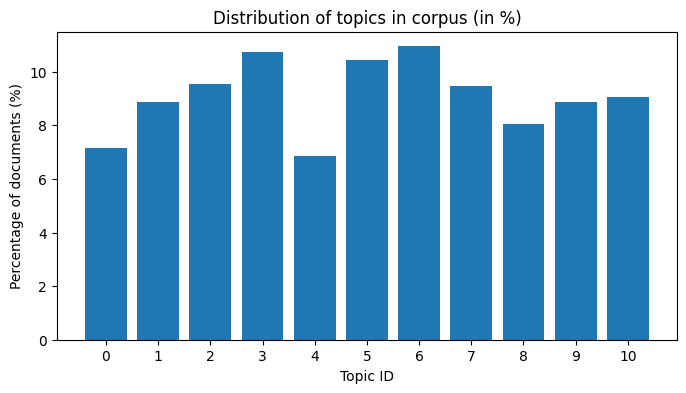

In [11]:
import matplotlib.pyplot as plt

top_topics = []
for doc in bow_corpus:  
    doc_topics = lda_model[doc]           
    top_topic = max(doc_topics, key=lambda x: x[1])[0]    
    top_topics.append(top_topic)

counts = Counter(top_topics)
topic_ids = list(range(lda_model.num_topics))
total_docs = len(top_topics)

# Подсчёт процентов
percentages = [(counts.get(t, 0) / total_docs) * 100 for t in topic_ids]

plt.figure(figsize=(8,4))
plt.bar(topic_ids, percentages)

plt.xticks(topic_ids)
plt.ylabel("Percentage of documents (%)")
plt.xlabel("Topic ID")
plt.title("Distribution of topics in corpus (in %)")

plt.show()

<span style="color:orange; font-size:18px;"><b>6. Word cloud for each topic</b></span>

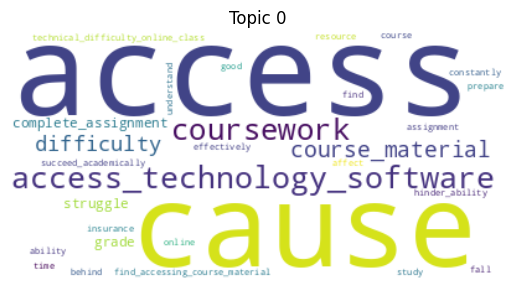

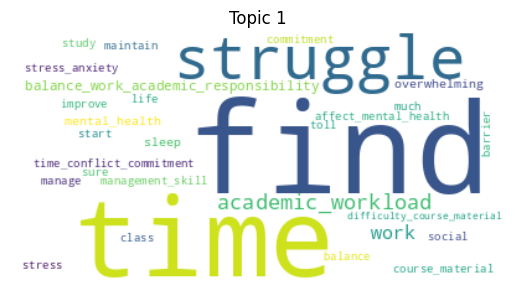

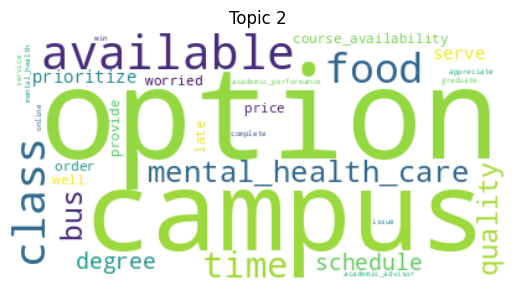

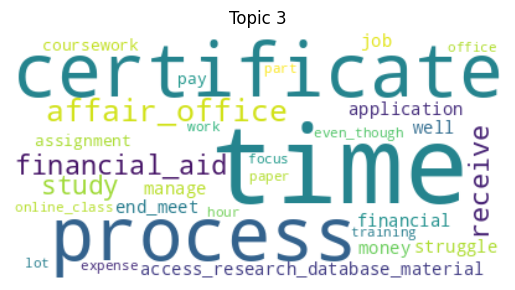

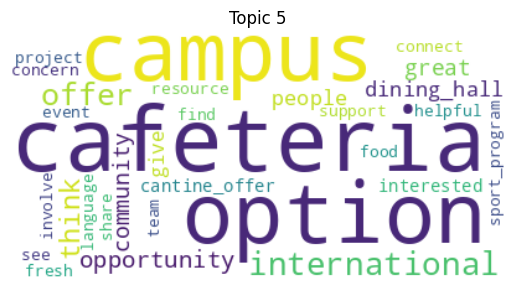

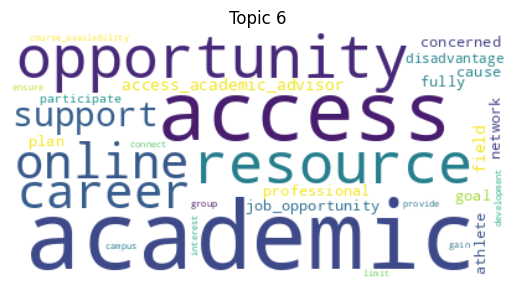

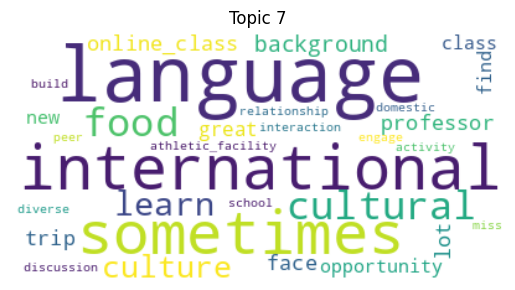

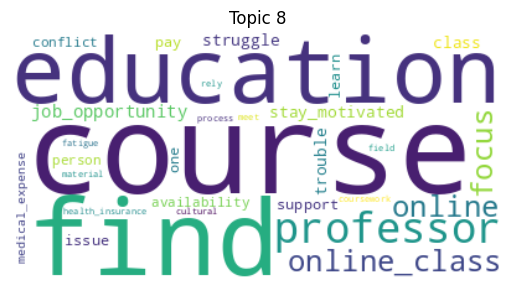

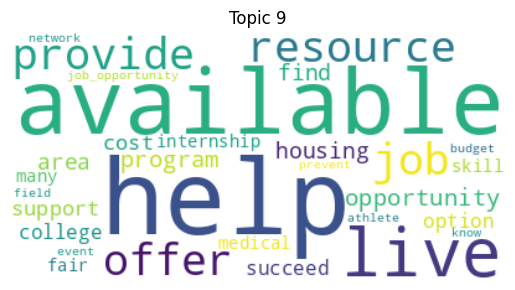

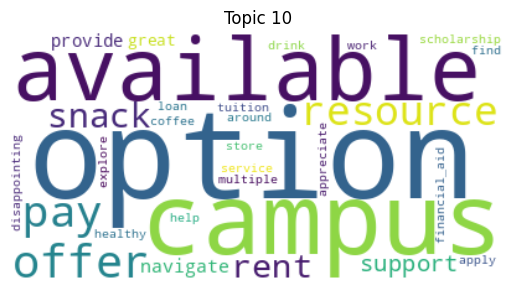

In [12]:
from wordcloud import WordCloud

topics = lda_model.show_topics(num_words=30, formatted=False)
topics_sorted = sorted(topics, key=lambda x: x[0])  # sort by topic_id

for topic_id, topic in topics_sorted:
    topic_words = dict(topic)
    wc = WordCloud(width=400, height=200, background_color="white").generate_from_frequencies(topic_words)
    
    plt.figure()
    plt.imshow(wc.to_array(), interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_id}")
    plt.show()

<span style="color:orange; font-size:18px;"><b>7. Intercative dashboard</b></span>

In [16]:
import pyLDAvis.gensim_models
import pyLDAvis

vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_vis.html')

<span style="color:orange; font-size:18px;"><b>8. Topic summary done by ChatGPT based on top-20 words for each topic</b></span>

<h1>Student Complaints Topic Summary (LDA)</h1>

<h2>Topic 0: Access & Technical Issues</h2>
<p>This topic focuses on students struggling to access course materials, technology, or online classes. Common concerns involve difficulties completing assignments and understanding coursework.</p>
<p class="keywords">Key words: access, cause, access_technology_software, coursework, course_material, difficulty, complete_assignment, struggle, grade, online</p>

<h2>Topic 1: Time Management & Stress</h2>
<p>Students report challenges balancing academic workload, work, and personal responsibilities. Issues include stress, sleep problems, and mental health struggles due to overwhelming commitments.</p>
<p class="keywords">Key words: find, time, struggle, academic_workload, work, balance_work_academic_responsibility, overwhelming, sleep, mental_health, stress_anxiety</p>

<h2>Topic 2: Campus Resources & Facilities</h2>
<p>This topic covers availability of campus resources such as classes, food options, mental health care, and transportation. Students express concern about quality, scheduling, and access to necessary facilities.</p>
<p class="keywords">Key words: option, campus, available, class, food, mental_health_care, bus, quality, degree, schedule</p>

<h2>Topic 3: Administrative & Financial Processes</h2>
<p>Focuses on struggles with administrative procedures, obtaining certificates, financial aid, and managing money while studying. Students face challenges in accessing resources and completing necessary paperwork.</p>
<p class="keywords">Key words: time, certificate, process, affair_office, financial_aid, receive, study, access_research_database_material, struggle, application</p>

<h2>Topic 4: Costs & Campus Environment</h2>
<p>Students discuss financial challenges, including campus costs, cafeteria options, medical expenses, and parking. There are also complaints about the general environment and support services.</p>
<p class="keywords">Key words: cost, find, cantine, impossible, available, campus, tough, stale, environment, medical_expense</p>

<h2>Topic 5: Cafeteria & Social Opportunities</h2>
<p>This topic highlights campus dining options and social opportunities, especially for international students. Students value community connections, events, and extracurricular programs.</p>
<p class="keywords">Key words: cafeteria, option, campus, international, offer, opportunity, community, people, dining_hall, cantine_offer</p>

<h2>Topic 6: Academic Access & Career Opportunities</h2>
<p>Students discuss access to academic resources, advisors, and career planning. They also emphasize opportunities for professional development and networking.</p>
<p class="keywords">Key words: academic, access, opportunity, resource, career, online, support, access_academic_advisor, professional, plan</p>

<h2>Topic 7: Language & Cultural Experiences</h2>
<p>This topic focuses on international students facing language barriers, cultural adaptation, and experiences with food, culture, and classes. Students report both challenges and opportunities for engagement.</p>
<p class="keywords">Key words: language, international, sometimes, cultural, food, learn, culture, background, trip, online_class</p>

<h2>Topic 8: Course Experience & Motivation</h2>
<p>Students report challenges with courses, online classes, professors, and maintaining motivation. Topics include struggles, issues with assignments, and opportunities for learning and growth.</p>
<p class="keywords">Key words: course, find, education, professor, online_class, online, focus, job_opportunity, class, struggle</p>

<h2>Topic 9: Housing & Support Services</h2>
<p>This topic emphasizes available support services, housing, job opportunities, and programs that help students succeed. Students discuss access, costs, and resources provided by the university.</p>
<p class="keywords">Key words: help, available, live, provide, offer, job, resource, opportunity, program, housing</p>

<h2>Topic 10: Campus Options & Financial Aid</h2>
<p>Students discuss campus options, offers, tuition, scholarships, and financial support. Key concerns include paying for services, navigating resources, and accessing opportunities.</p>
<p class="keywords">Key words: option, campus, available, offer, pay, resource, snack, rent, support, provide</p>

</body>
</html>
